# Base Line Model

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv('gurgaon_properties_post_feature_selection.csv')

In [242]:
df.head(3)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32


In [243]:
df.shape

(3554, 13)

In [244]:
x = df.drop(columns = ['price'])
y = df['price']
print(x.shape)
print(y.shape)

(3554, 12)
(3554,)


# First we will apply linear regression
### Without OHE & normalization

In [245]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [247]:
print(x_train.shape)
print(y_train.shape)

(2665, 12)
(2665,)


In [248]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [249]:
y_pred = lr.predict(x_test)

In [250]:
from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error

In [251]:
r2_score(y_pred,y_test)

0.5802768979988591

In [252]:
mean_squared_error(y_pred,y_test)

2.6090957726738573

### apply log1p transformation on output columns

/var/folders/y6/_z0fchrs4db87h8gj8n699qh0000gn/T/ipykernel_88155/476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<AxesSubplot: xlabel='price', ylabel='Density'>

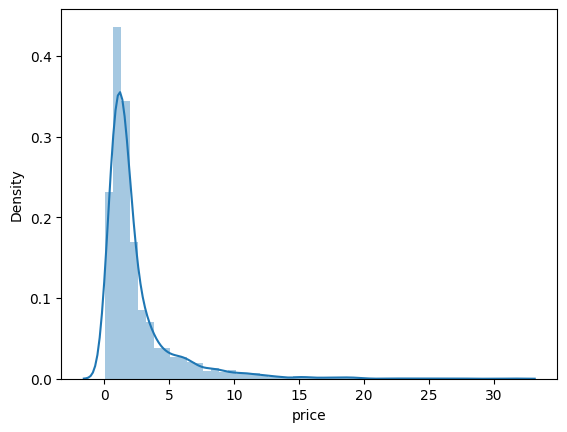

In [253]:
sns.distplot(y)

In [254]:
# so that ye normally distributed ho jae
y_transformed = np.log1p(y)

/var/folders/y6/_z0fchrs4db87h8gj8n699qh0000gn/T/ipykernel_88155/1376935547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_transformed)


<AxesSubplot: xlabel='price', ylabel='Density'>

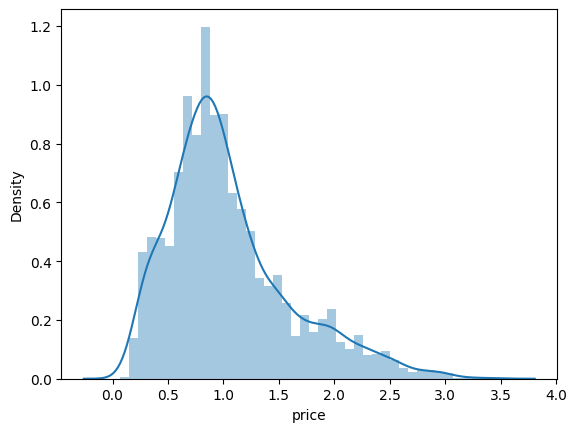

In [255]:
sns.distplot(y_transformed)

### With OHE & Normalization
#### column transformer and pipeline

In [256]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [257]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

In [258]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
transformers = [
    ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
    ('cat', OneHotEncoder(), columns_to_encode )
],remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['property_type', 'bedRoom', 'bathroom',
                                  'built_up_area', 'servant room',
                                  'store room']),
                                ('cat', OneHotEncoder(),
                                 ['sector', 'balcony', 'agePossession',
                                  'furnishing_type', 'luxury_category',
                                  'floor_category'])])

In [259]:
# create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [260]:
# now apply kfold cross validation
from sklearn.model_selection import cross_val_score, KFold

In [261]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(pipeline,x,y_transformed,cv=kfold,scoring = 'r2')

In [262]:
scores

array([0.85956886, 0.88441186, 0.86394893, 0.87147174, 0.86337977,
       0.83332887, 0.86018244, 0.8417079 , 0.84034003, 0.83978728])

In [263]:
# r2 score
scores.mean()

0.8558127693704556

In [264]:
scores.std()

0.015557844410315744

In [265]:
# now calculate mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y_transformed,test_size = 0.25, random_state = 42)

In [266]:
model = pipeline.fit(x_train,y_train)

In [267]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [268]:
y_pred = model.predict(x_test)
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

In [269]:
mean_absolute_error(y_pred,y_test)


# on aqan avg ye 67 lakh ki galti kr rha hai price prediction me

0.6768752632423456

# Model Selection

In [270]:
df = pd.read_csv('gurgaon_properties_post_feature_selection_v2.csv')

In [271]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,0.0,High,Mid Floor


In [272]:
df['furnishing_type'].value_counts()

0.0    2349
1.0    1018
2.0     187
Name: furnishing_type, dtype: int64

In [273]:
df['furnishing_type'] = df['furnishing_type'].replace({0.0:'unfurnished',1.0:'semifurnished',2.0:'furnished'})

In [274]:
df['furnishing_type'].value_counts()

unfurnished      2349
semifurnished    1018
furnished         187
Name: furnishing_type, dtype: int64

In [275]:
df.head(3)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,unfurnished,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,unfurnished,Low,High Floor


In [276]:
x = df.drop(columns = ['price'])
y = df['price']

In [277]:
print(df.shape)
print(x.shape)
print(y.shape)

(3554, 13)
(3554, 12)
(3554,)


In [278]:
y_transformed = np.log1p(y)

In [279]:
type(y_transformed)

pandas.core.series.Series

# Ordinal Encoding

In [280]:
from sklearn.preprocessing import OrdinalEncoder
df.sample()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
2324,house,sector 12,6.0,4.0,6.0,2,Old Property,1710.0,0.0,0.0,unfurnished,Low,Low Floor


In [289]:
columns_to_encode = ['property_type','sector','balcony', 'agePossession','furnishing_type','luxury_category','floor_category']

In [290]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(),['bedRoom','bathroom','built_up_area','servant room','store room']),
        ('cat',OrdinalEncoder(), columns_to_encode)
    ],remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['bedRoom', 'bathroom', 'built_up_area',
                                  'servant room', 'store room']),
                                ('cat', OrdinalEncoder(),
                                 ['property_type', 'sector', 'balcony',
                                  'agePossession', 'furnishing_type',
                                  'luxury_category', 'floor_category'])])

In [291]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',LinearRegression())   
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [296]:
# kfold cross validation
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
cross = cross_val_score(pipeline,x,y_transformed,cv = kfold, scoring = 'r2')
cross

array([0.7112841 , 0.75780656, 0.75338985, 0.75435482, 0.7495126 ,
       0.68068362, 0.79641346, 0.72883971, 0.69340419, 0.73740773])

In [297]:
cross.mean()

0.7363096633436828

In [298]:
cross.std()

0.03238005754429931

In [299]:
x_train,x_test,y_train,y_test = train_test_split(x,y_transformed,test_size = 0.2,random_state = 42)

In [301]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [303]:
y_pred = pipeline.predict(x_test)

In [304]:
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

In [306]:
mean_absolute_error(y_pred,y_test)

0.9463822160089367

# Gradient Boosting

In [308]:
from sklearn.ensemble import GradientBoostingRegressor

In [310]:
df.head(1)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor


In [309]:
columns_to_encode = ['property_type','sector','balcony', 'agePossession','furnishing_type','luxury_category','floor_category']


In [312]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(), ['bedRoom','bathroom','built_up_area','servant room','store room']),
        ('cat',OrdinalEncoder(), columns_to_encode)
    ],remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['bedRoom', 'bathroom', 'built_up_area',
                                  'servant room', 'store room']),
                                ('cat', OrdinalEncoder(),
                                 ['property_type', 'sector', 'balcony',
                                  'agePossession', 'furnishing_type',
                                  'luxury_category', 'floor_category'])])

In [314]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor', GradientBoostingRegressor())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', GradientBoostingRegressor())])

In [315]:
kfold = KFold(n_splits = 10,shuffle = True, random_state = 42)
score = cross_val_
score(pipeline,x,y_transformed,cv = kfold,scoring = 'r2')

In [316]:
score.mean()

0.872663935590609

In [317]:
x_train,x_test,y_train,y_test = train_test_split(x,y_transformed,test_size = 0.2,random_state = 42)

In [318]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', GradientBoostingRegressor())])

In [319]:
y_pred = pipeline.predict(x_test)

In [320]:
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

In [321]:
mean_absolute_error(y_pred,y_test)

0.575929847860776

# Random Forest and Target Encoder

In [324]:
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce

In [326]:
columns_to_encode = ['property_type','sector','balcony', 'agePossession','furnishing_type','luxury_category','floor_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OrdinalEncoder(), columns_to_encode),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False),['agePossession']),
        ('target_enc', ce.TargetEncoder(), ['sector'])
    ], 
    remainder='passthrough'
)
print(preprocessor)


pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor', RandomForestRegressor())
])
print(pipeline)


kfold = KFold(n_splits = 10,shuffle = True, random_state = 42)
score = cross_val_score(pipeline,x,y_transformed,cv = kfold,scoring = 'r2')


print(score.mean())

x_train,x_test,y_train,y_test = train_test_split(x,y_transformed,test_size = 0.2,random_state = 42)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)



ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['bedRoom', 'bathroom', 'built_up_area',
                                  'servant room', 'store room']),
                                ('cat', OrdinalEncoder(),
                                 ['property_type', 'sector', 'balcony',
                                  'agePossession', 'furnishing_type',
                                  'luxury_category', 'floor_category']),
                                ('cat1',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['agePossession']),
                                ('target_enc', TargetEncoder(), ['sector'])])
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                

In [327]:
print(mean_absolute_error(y_pred,y_test))

0.45839597496010953


# Hyperparameter Tuning

In [333]:
from sklearn.model_selection import GridSearchCV

In [342]:
param_grid = {
    'regressor__n_estimators' : [50,100,200,300],
    'regressor__max_depth':[None,10,20,30],
    'regressor__max_samples':[0.1,0.25,0.5,1.0],
    'regressor__max_features' : ['auto','sqrt']
}

In [343]:
columns_to_encode = ['property_type','sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OrdinalEncoder(), columns_to_encode),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False),['agePossession']),
        ('target_enc', ce.TargetEncoder(), ['sector'])
    ], 
    remainder='passthrough'
)

In [344]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [345]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [346]:
search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)
search

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['bedRoom',
                                                                          'bathroom',
                                                                          'built_up_area',
                                                                          'servant '
                                                                          'room',
                                                                          'store '
                                                                          'room']),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         ['property_type',
                                                                          'sector',
                                                                          'balcony',
                                                                          'agePossession',
                                                                          'furnishing_type',...
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['agePossession']),
                                                                        ('target_enc',
                                                                         TargetEncoder(),
                                                                         ['sector'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__max_samples': [0.1, 0.25, 0.5, 1.0],
                         'regressor__n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=4)

In [347]:
search.fit(x, y_transformed)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

[CV 2/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.907 total time=   0.3s
[CV 6/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.871 total time=   0.5s
[CV 4/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.884 total time=   1.1s
[CV 10/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.870 total time=   1.3s
[CV 8/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.879 total time=   1.5s
[CV 7/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=50;, score=0.883 total time=   0.5s
[CV 3/10] END regressor__max_depth=None,

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

[CV 6/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.866 total time=   0.3s
[CV 4/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.885 total time=   0.5s
[CV 1/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.888 total time=   1.2s
[CV 2/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.912 total time=   1.9s
[CV 10/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.871 total time=   1.5s
[CV 8/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=100;, score=0.888 total time=   0.9s
[CV 6/10] END regressor__max_depth=None

[CV 3/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.904 total time=   0.3s
[CV 9/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.851 total time=   0.4s
[CV 7/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.878 total time=   0.5s
[CV 5/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.883 total time=   1.2s
[CV 3/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.899 total time=   1.8s
[CV 1/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=50;, score=0.892 total time=   0.5s
[CV 5/10] END regressor__max_depth=None, r

[CV 1/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.881 total time=   0.3s
[CV 10/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.873 total time=   0.4s
[CV 8/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.880 total time=   0.5s
[CV 6/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.868 total time=   1.2s
[CV 4/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.886 total time=   1.9s
[CV 2/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=50;, score=0.918 total time=   0.5s
[CV 6/10] END regressor__max_depth=None, 

[CV 5/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.884 total time=   0.3s
[CV 3/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.893 total time=   0.5s
[CV 10/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.868 total time=   0.5s
[CV 8/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.877 total time=   1.5s
[CV 6/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.867 total time=   1.6s
[CV 4/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=50;, score=0.903 total time=   0.5s
[CV 10/10] END regressor__max_depth=None

[CV 8/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.871 total time=   0.3s
[CV 5/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.879 total time=   0.5s
[CV 9/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.848 total time=   0.5s
[CV 7/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.881 total time=   1.2s
[CV 5/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.883 total time=   1.7s
[CV 3/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=50;, score=0.917 total time=   0.5s
[CV 9/10] END regressor__max_depth=None, 

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['bedRoom',
                                                                          'bathroom',
                                                                          'built_up_area',
                                                                          'servant '
                                                                          'room',
                                                                          'store '
                                                                          'room']),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         ['property_type',
                                                                          'sector',
                                                                          'balcony',
                                                                          'agePossession',
                                                                          'furnishing_type',...
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['agePossession']),
                                                                        ('target_enc',
                                                                         TargetEncoder(),
                                                                         ['sector'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__max_samples': [0.1, 0.25, 0.5, 1.0],
                         'regressor__n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=4)

In [348]:
final_pipe = search.best_estimator_
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category']),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['agePossession']),
                                                 ('target_enc', TargetEncoder(),
                                                  ['sector'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       max_samples=1.0, n_estimators=300))])

In [349]:

search.best_params_

{'regressor__max_depth': 20,
 'regressor__max_features': 'sqrt',
 'regressor__max_samples': 1.0,
 'regressor__n_estimators': 300}

In [350]:
search.best_score_

0.902800743362611

In [353]:
final_pipe.fit(x,y_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category']),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['agePossession']),
                                                 ('target_enc', TargetEncoder(),
                                                  ['sector'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       max_samples=1.0, n_estimators=300))])

[CV 4/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.885 total time=   0.2s
[CV 2/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.910 total time=   0.6s
[CV 3/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.900 total time=   1.0s
[CV 9/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.850 total time=   1.3s
[CV 7/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.881 total time=   1.6s
[CV 8/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=50;, score=0.888 total time=   0.5s
[CV 4/10] END regressor__max_depth=None, 

[CV 5/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.869 total time=   0.3s
[CV 9/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.861 total time=   0.5s
[CV 4/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.857 total time=   0.5s
[CV 8/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.874 total time=   0.5s
[CV 1/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.888 total time=   0.8s
[CV 7/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.875 total time=   0.8s
[CV 8/10] END regressor__max_depth=20, regressor__ma

[CV 2/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.898 total time=   0.3s
[CV 6/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.863 total time=   0.3s
[CV 10/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.887 total time=   0.5s
[CV 7/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.874 total time=   0.5s
[CV 2/10] END regressor__max_depth=20, regressor__max_features=sqrt, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.897 total time=   0.8s
[CV 8/10] END regressor__max_depth=20, regressor__m

[CV 7/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=50;, score=0.878 total time=   0.3s
[CV 1/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=100;, score=0.886 total time=   0.6s
[CV 2/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=200;, score=0.912 total time=   1.2s
[CV 1/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.889 total time=   1.9s
[CV 9/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.1, regressor__n_estimators=300;, score=0.851 total time=   1.4s
[CV 6/10] END regressor__max_depth=None, regressor__max_features=auto, regressor__max_samples=0.25, regressor__n_estimators=100;, score=0.880 total time=   0.9s
[CV 4/10] END regressor__max_depth=None,

[CV 7/10] END regressor__max_depth=20, regressor__max_features=auto, regressor__max_samples=0.5, regressor__n_estimators=200;, score=0.895 total time=   2.5s
[CV 5/10] END regressor__max_depth=20, regressor__max_features=auto, regressor__max_samples=0.5, regressor__n_estimators=300;, score=0.911 total time=   3.7s
[CV 3/10] END regressor__max_depth=20, regressor__max_features=auto, regressor__max_samples=1.0, regressor__n_estimators=50;, score=0.927 total time=   1.0s
[CV 8/10] END regressor__max_depth=20, regressor__max_features=auto, regressor__max_samples=1.0, regressor__n_estimators=50;, score=0.891 total time=   1.0s
[CV 4/10] END regressor__max_depth=20, regressor__max_features=auto, regressor__max_samples=1.0, regressor__n_estimators=100;, score=0.904 total time=   2.0s
[CV 2/10] END regressor__max_depth=20, regressor__max_features=auto, regressor__max_samples=1.0, regressor__n_estimators=200;, score=0.933 total time=   3.8s
[CV 10/10] END regressor__max_depth=20, regressor__max